In [1]:
#  Step 1: Import libraries
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
import numpy as np

#  Step 2: Load and preprocess data
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize pixel values (0-255 → 0-1)
x_train = x_train / 255.0
x_test = x_test / 255.0

# Reshape for CNN input: (samples, height, width, channels)
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

#  Step 3: Define CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')  # 10 digit classes
])

#  Step 4: Compile model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

#  Step 5: Train the model
history = model.fit(x_train, y_train, epochs=5,
                    validation_data=(x_test, y_test))

#  Step 6: Evaluate on test data
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f" Test Accuracy: {test_acc:.4f}")

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 59s 30ms/step - accuracy: 0.9083 - loss: 0.2994 - val_accuracy: 0.9845 - val_loss: 0.0495
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 55s 29ms/step - accuracy: 0.9852 - loss: 0.0477 - val_accuracy: 0.9881 - val_loss: 0.0371
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 86s 31ms/step - accuracy: 0.9907 - loss: 0.0301 - val_accuracy: 0.9902 - val_loss: 0.0317
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 80s 30ms/step - accuracy: 0.9922 - loss: 0.0236 - val_accuracy: 0.9897 - val_loss: 0.0298
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 53s 28ms/step - accuracy: 0.9945 - loss: 0.0168 - val_accuracy: 0.9906 - val_loss: 0.0314
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9882 - loss: 0.0401
 Test Accuracy: 0.9906


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


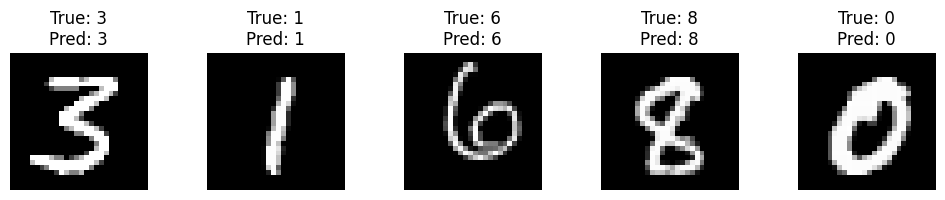

In [2]:
# Pick 5 random samples from the test set
sample_indices = np.random.choice(len(x_test), size=5, replace=False)
sample_images = x_test[sample_indices]
sample_labels = y_test[sample_indices]

# Predict labels
predictions = model.predict(sample_images)

# Plot images with predicted and true labels
plt.figure(figsize=(10, 2))
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.imshow(sample_images[i].reshape(28, 28), cmap='gray')
    plt.title(f"True: {sample_labels[i]}\nPred: {np.argmax(predictions[i])}")
    plt.axis('off')
plt.tight_layout()
plt.show()